In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../from_arc/segan_2d_cv.csv')

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,label,version,fold,hparams_batch_size,hparams_channels_per_group,hparams_cuda,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,...,metrics_train_opt1_loss_epoch_final,metrics_train_opt1_dsc_0_epoch_min,metrics_train_opt1_dsc_0_epoch_max,metrics_train_opt1_dsc_0_epoch_final,metrics_train_opt1_dsc_1_epoch_min,metrics_train_opt1_dsc_1_epoch_max,metrics_train_opt1_dsc_1_epoch_final,metrics_train_opt1_dsc_2_epoch_min,metrics_train_opt1_dsc_2_epoch_max,metrics_train_opt1_dsc_2_epoch_final
0,segan_2d_cv,16629948,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,0.214775,0.868154,0.936694,0.931857,0.090218,0.957569,0.942115,0.681905,0.987368,0.977234
1,segan_2d_cv,16629950,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,0.235523,0.876851,0.934561,0.930862,0.182609,0.950249,0.936708,0.676034,0.983728,0.974256
2,segan_2d_cv,16629945,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,...,0.163889,0.868867,0.934424,0.931252,0.000000,0.954610,0.946235,0.731256,0.985881,0.980867
3,segan_2d_cv,16629947,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,...,0.105724,0.815249,0.934967,0.932132,0.365773,0.955632,0.952478,0.634673,0.985855,0.984396
4,segan_2d_cv,16629949,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,0.098207,0.817582,0.942103,0.940515,0.000149,0.961694,0.961176,0.725505,0.988728,0.987646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,segan_2d_cv,16629967,3,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,0.239683,0.555442,0.939489,0.935867,0.000000,0.962660,0.962062,0.738666,0.989729,0.989729
86,segan_2d_cv,16629971,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,0.108883,0.592463,0.934877,0.933211,0.155428,0.960120,0.959107,0.647190,0.988901,0.988901
87,segan_2d_cv,16629962,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,0.259582,0.696139,0.942090,0.937320,0.000000,0.963397,0.960246,0.718311,0.988617,0.988519
88,segan_2d_cv,16629964,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,0.100353,0.827771,0.943961,0.943961,0.078359,0.968346,0.967912,0.747163,0.991332,0.991332


In [4]:
col_rename_dict = {}
for col in df.columns:
    if "metrics" in col:
        col_str = col
        col_str = col_str.replace("metrics_", "")
        col_str = col_str.replace("metrics ", "")
        col_str = col_str.replace("dsc_0", "cort_dice")
        col_str = col_str.replace("dsc_1", "trab_dice")
        col_str = col_str.replace("dsc_2", "back_dice")
        col_rename_dict[col] = col_str
df.rename(columns=col_rename_dict, inplace=True)

In [5]:
id_vars = ["label", "version", "fold"]
for col in df.columns:
    if "hparams" in col:
        id_vars.append(col)
df = pd.melt(df, id_vars=id_vars)
df

,label,version,fold,hparams_batch_size,hparams_channels_per_group,hparams_cuda,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,...,hparams_log_step_interval,hparams_log_sync_dist,hparams_logger,hparams_model_channels,hparams_num_workers,hparams_output_channels,hparams_upsample_mode,hparams_version,variable,value
0,segan_2d_cv,16629948,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,3,True,True,"[32, 64, 128, 256]",4,3,bilinear,16629948,val_loss_epoch_min,0.135135
1,segan_2d_cv,16629950,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,3,True,True,"[32, 64, 128, 256]",4,3,bilinear,16629950,val_loss_epoch_min,0.138901
2,segan_2d_cv,16629945,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,...,3,True,True,"[32, 64, 128, 256]",4,3,bilinear,16629945,val_loss_epoch_min,0.130498
3,segan_2d_cv,16629947,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,...,3,True,True,"[32, 64, 128, 256]",4,3,bilinear,16629947,val_loss_epoch_min,0.102404
4,segan_2d_cv,16629949,0,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,3,True,True,"[32, 64, 128, 256]",4,3,bilinear,16629949,val_loss_epoch_min,0.087549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,segan_2d_cv,16629967,3,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,3,True,True,"[32, 64, 128, 256, 512]",4,3,bilinear,16629967,train_opt1_back_dice_epoch_final,0.989729
3236,segan_2d_cv,16629971,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,...,3,True,True,"[32, 64, 128, 256, 512]",4,3,bilinear,16629971,train_opt1_back_dice_epoch_final,0.988901
3237,segan_2d_cv,16629962,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,3,True,True,"[32, 64, 128, 256, 512]",4,3,bilinear,16629962,train_opt1_back_dice_epoch_final,0.988519
3238,segan_2d_cv,16629964,4,256,16,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,...,3,True,True,"[32, 64, 128, 256, 512]",4,3,bilinear,16629964,train_opt1_back_dice_epoch_final,0.991332


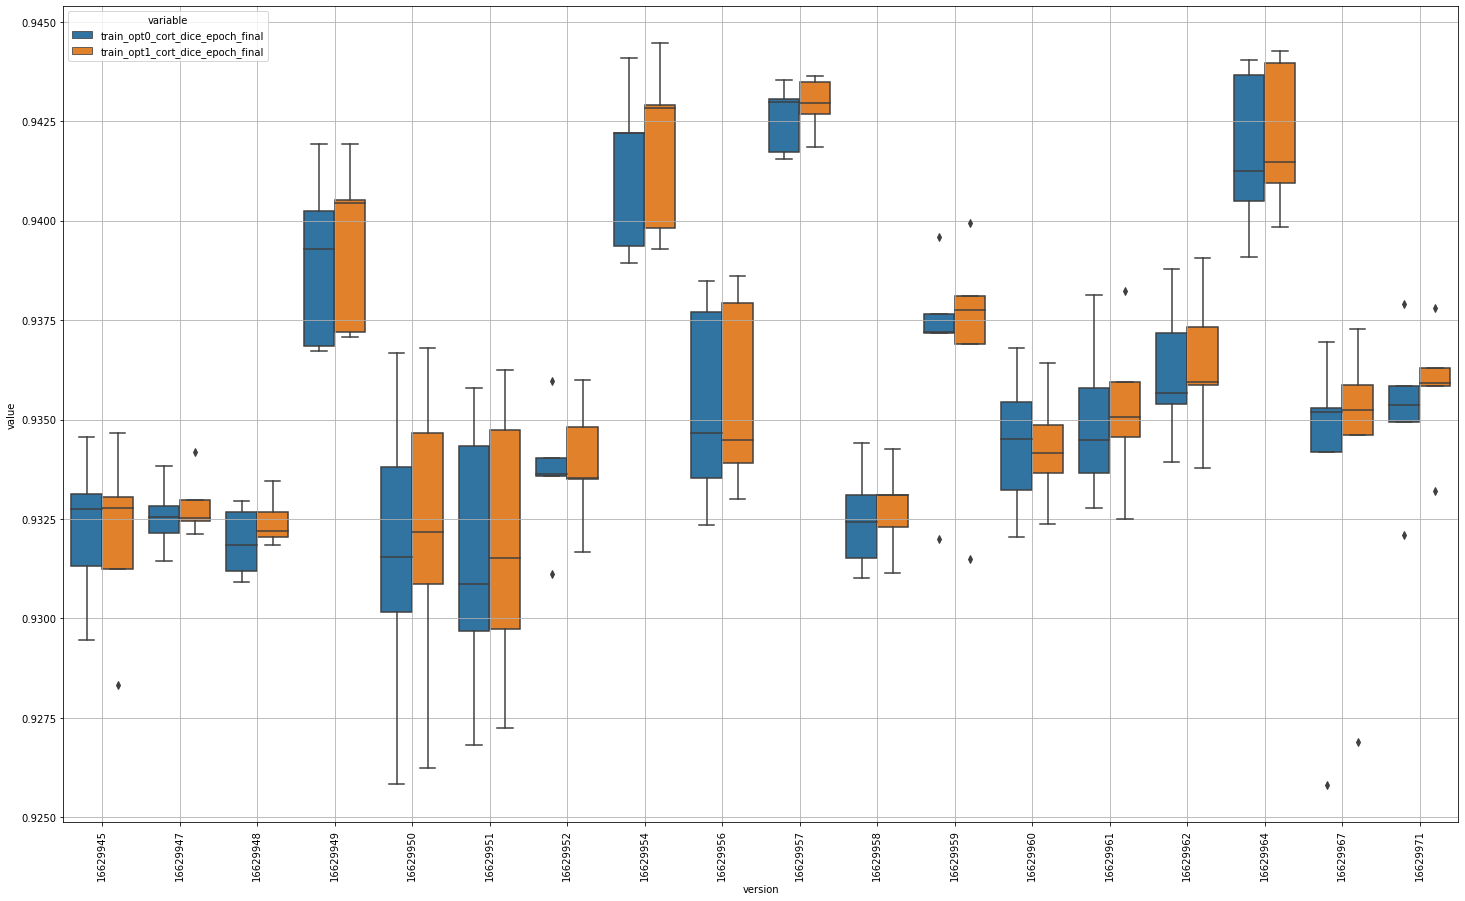

In [6]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("train") & df["variable"].str.contains("cort_dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

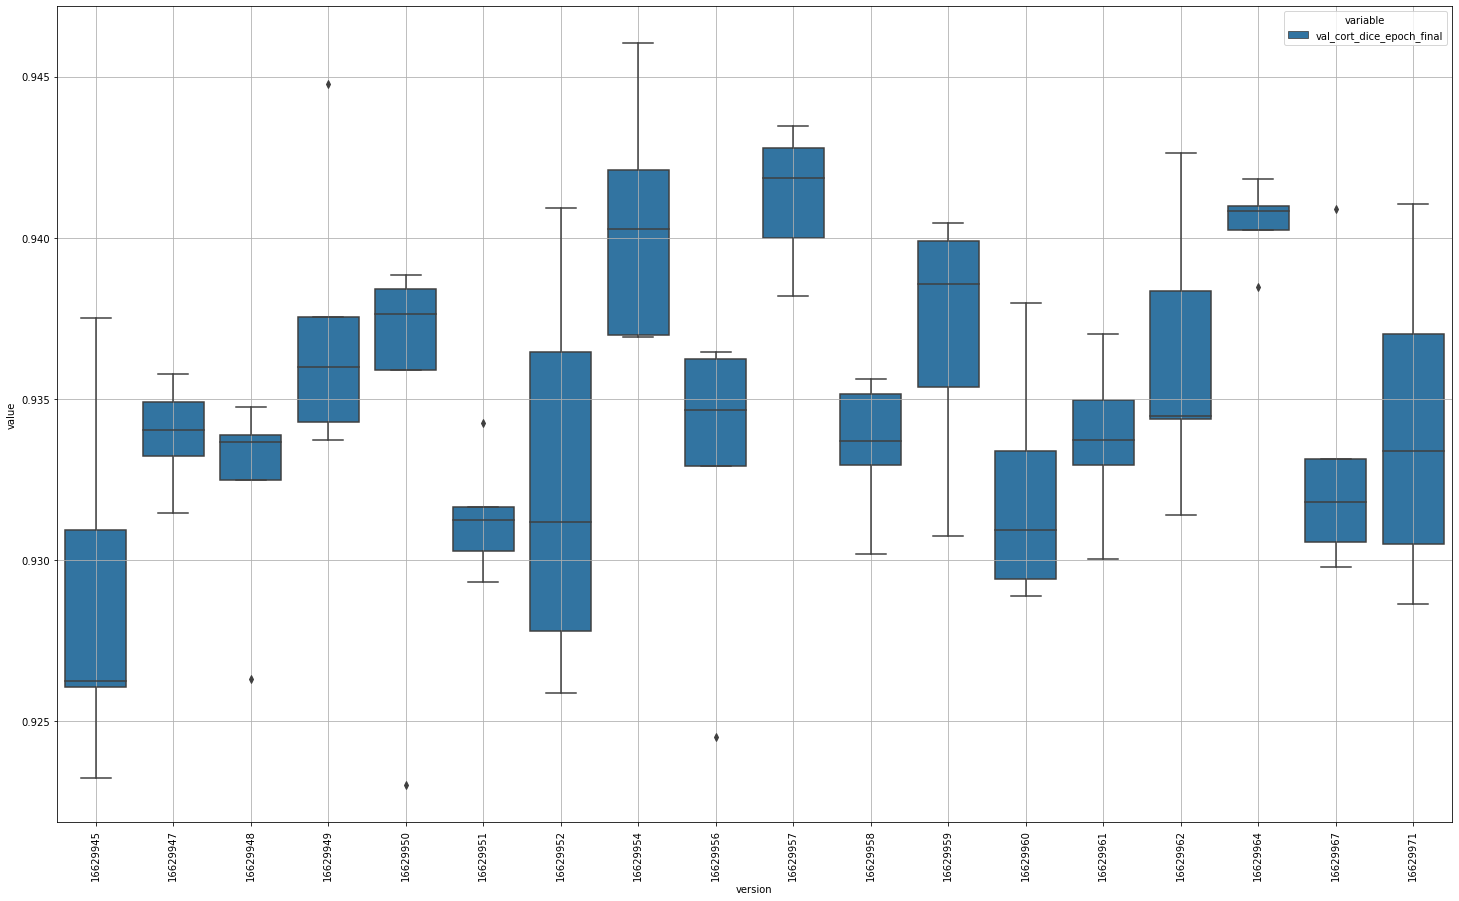

In [7]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("val") & df["variable"].str.contains("cort_dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [8]:
df_averaged = df.groupby(["version", "variable"], as_index=False)['value'].mean()
df_averaged_cort_dice = df_averaged[df_averaged["variable"]=="val_cort_dice_epoch_final"]
df_averaged_cort_dice.sort_values(by="value", ascending=False)

,version,variable,value
351,16629957,val_cort_dice_epoch_final,0.941258
567,16629964,val_cort_dice_epoch_final,0.940468
279,16629954,val_cort_dice_epoch_final,0.940464
135,16629949,val_cort_dice_epoch_final,0.937261
423,16629959,val_cort_dice_epoch_final,0.937010
531,16629962,val_cort_dice_epoch_final,0.936247
171,16629950,val_cort_dice_epoch_final,0.934770
639,16629971,val_cort_dice_epoch_final,0.934125
63,16629947,val_cort_dice_epoch_final,0.933888
495,16629961,val_cort_dice_epoch_final,0.933729


In [9]:
best_version = df_averaged_cort_dice.sort_values(by="value", ascending=False)['version'].iloc[0]
df[df["version"] == best_version][[col for col in df.columns if "hparam" in col]].iloc[0]

hparams_batch_size                                                               256
hparams_channels_per_group                                                        16
hparams_cuda                                                                    True
hparams_data_dirs                  ['/home/njneetes/work/data/NORMXTII/radius_pic...
hparams_dropout                                                                  0.3
hparams_early_stopping_patience                                                   40
hparams_epochs                                                                    50
hparams_folds                                                                      5
hparams_hours_per_fold                                                             4
hparams_input_channels                                                             1
hparams_is_3d                                                                  False
hparams_label                                                    

In [10]:
df[df["version"] == best_version].groupby(["variable"])['value'].mean()

variable
train_opt0_back_dice_epoch_final    0.988913
train_opt0_back_dice_epoch_max      0.990168
train_opt0_back_dice_epoch_min      0.678597
train_opt0_cort_dice_epoch_final    0.942573
train_opt0_cort_dice_epoch_max      0.944024
train_opt0_cort_dice_epoch_min      0.767398
train_opt0_loss_epoch_final         0.107917
train_opt0_loss_epoch_max           0.291650
train_opt0_loss_epoch_min           0.098882
train_opt0_trab_dice_epoch_final    0.964043
train_opt0_trab_dice_epoch_max      0.965939
train_opt0_trab_dice_epoch_min      0.118414
train_opt1_back_dice_epoch_final    0.989072
train_opt1_back_dice_epoch_max      0.990259
train_opt1_back_dice_epoch_min      0.741446
train_opt1_cort_dice_epoch_final    0.942925
train_opt1_cort_dice_epoch_max      0.944456
train_opt1_cort_dice_epoch_min      0.850190
train_opt1_loss_epoch_final         0.106574
train_opt1_loss_epoch_max           0.276094
train_opt1_loss_epoch_min           0.097655
train_opt1_trab_dice_epoch_final    0.964449
t